# Practice: Statistical analysis of the Lipinski's rule of five

## Theory

### **Pharmacokinetics**

Pharmacokinetics are the study of what happens to a compound in an organism over a period of time ([Grogan S, Preuss CV. Pharmacokinetics, 2022](https://www.ncbi.nlm.nih.gov/books/NBK557744/)). It is divide into four steps: **A**bsorption, **D**istribution, **M**etabolism and **E**xcretion ([ADME](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4110820/)). Some times also is includes **T**oxicology (ADMET) and **L**iberation (LADME).

 
![ADME](Data/ADME.jpg)

*Figure 1*. Steps that make up the pharmacokinetics. From: [Somvanshi, Kharat, Jadhav, Thorat & Townley, 2021](https://doi.org/10.1016/B978-0-323-85050-6.00007-4)

   * **Absorption:** It refers to the amount and time it takes for a compound or substance to enter to the systemic circulationt from the site of administration. This depends on multiple factors such as the ability of the compound to penetrate the intestinal wall, the solubility of the compound, the gastric emptying time, the chemical stability of the compound in the stomach, among others.
   * **Distribution:** It refers to how a substance is spread throughout the body. This depends on the diffusion and convection which may be influenced by the polarity, size, or binding abilities of the drug, the fluid status of the patient, or the body habitus of the individual. It is very important to achieve the effective drug concentration in the receptor site because to be effective a medication must reach its designated compartmental destination.
   * **Metabolism:** It refers to the processing of the drug by the body into subsequent compounds. It can be also to convert a drug  into more water-soluble substances in order to be more easily to excreted or in the case of prodrugs the metabolism is required to convert the drug into active metabolites.
   * **Excretion:** It refers to the process by which the drug is eliminated from the body. Generally the kidneys are the conduct of excretion by a passive filtration in the glomerulus or secretion in the tubules.

### **Lipinski's rule of five:**

The Lipinski's rule of five is one way to screen out compounds with probable absorption problems. This rule states that poor absorption or permeation of a drug is more probable when the chemical structure fulfils two or more of the [following criteria:](https://www.sciencedirect.com/science/article/pii/B008045044X001474)
1. Molecular weight (MW) is greater than 500.
2. The calculated log P value is above 5.
3. There are more than 5 hydrogen bond donors (–NH–, –OH).
4. The number of hydrogen bond acceptors (–N ¼ , –O–) is greater than 10.

It is importat to know that the rule of five e does not definitively categorize all well and poorly absorbed compounds, although it is simple, fast, and provides a reasonable degree of classification.

## Problem Statement

For an investigation of a new drug we want to know if it is really absorbed by the body, if it is able to cross certain barriers to reach his target, how is it metabolized and how is excreted from the body. In this way doctors will have greater flexibility in prescribing and administering medications thus providing greater benefit with less risk and making adjustments as necessary, given the varied physiology and lifestyles of patients.

In order to know the absorption of the compounds we will use bioinformatic tools to be able to calculate Lipinski's rule of five and then we will calculate some statistics to plot them and analyze.

## Import the necessary libraries

In [25]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
from rdkit.Chem import Draw
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from math import pi

## Load dataset of GSK3B
#### Describir el conjunto que se está cargando, a qué hace referencia?

In [26]:
comp_def = pd.read_csv('data/GSK3B_compounds.csv', index_col=0)
print(f'Total compounds: {comp_def.shape}')
comp_def.head()

Total compounds: (2291, 3)


,pIC50,smiles,ROMol
molecule_chembl_id,,,
CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i..."
CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,"<img data-content=""rdkit/molecule"" src=""data:i..."
CHEMBL3942619,9.70,COc1ccc(-c2cnc(N)c(C(=O)Nc3cnccc3N3CCC(N)CC3)n...,"<img data-content=""rdkit/molecule"" src=""data:i..."
CHEMBL3963605,9.70,Nc1ncc(-c2ccccc2)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i..."
CHEMBL2386090,9.70,O=C1NC(=O)C(c2cn3c4c(cccc24)CN(C(=O)c2cnccn2)C...,"<img data-content=""rdkit/molecule"" src=""data:i..."


## Lipinski's rule of five

The function below will allow us to calculate the chemical properties of Lipinski's rule of five having as input the SMILES. Then the conditions of the rule of five will be defined and finally we will have information whetherrule of five is violated.

In [27]:
def df_rule_5(df):
    
    smi = df['smiles']
    m = Chem.MolFromSmiles(smi)
    
    # Calculate rule of five chemical properties
    MW = Descriptors.ExactMolWt(m)
    HBA = Descriptors.NumHAcceptors(m)
    HBD = Descriptors.NumHDonors(m)
    LogP = Descriptors.MolLogP(m)
    
    # Rule of five conditions
    conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]
    
    # Create pandas row for conditions results with values and information whether rule of five is violated 
    return pd.Series([MW, HBA, HBD, LogP, 'yes']) if conditions.count(True) >= 3 else pd.Series([MW, HBA, HBD, LogP, 'no'])

Now we are going to apply Lipinski's rule of 5 to our data set

In [28]:
rule5_df = comp_def.apply(df_rule_5, axis=1)
print('# of compounds in unfiltered data set:', len(comp_def))

# of compounds in unfiltered data set: 2291


In [29]:
# Name condition columns
rule5_df.columns= ['MW', 'HBA', 'HBD', 'LogP', 'rule_of_five_conform']

In [30]:
# Concatenate dataset with computed values
comp_def = comp_def.join(rule5_df)
comp_def

,pIC50,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
molecule_chembl_id,,,,,,,,
CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i...",484.211055,7,1,3.2107,yes
CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,"<img data-content=""rdkit/molecule"" src=""data:i...",393.171336,7,3,1.9218,yes
CHEMBL3942619,9.70,COc1ccc(-c2cnc(N)c(C(=O)Nc3cnccc3N3CCC(N)CC3)n...,"<img data-content=""rdkit/molecule"" src=""data:i...",419.206973,8,3,2.3092,yes
CHEMBL3963605,9.70,Nc1ncc(-c2ccccc2)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i...",389.196408,7,3,2.3006,yes
CHEMBL2386090,9.70,O=C1NC(=O)C(c2cn3c4c(cccc24)CN(C(=O)c2cnccn2)C...,"<img data-content=""rdkit/molecule"" src=""data:i...",489.143704,7,1,3.4007,yes
...,...,...,...,...,...,...,...,...
CHEMBL2207943,3.32,CN1C(=O)CC(c2cccs2)Sc2ccccc21,"<img data-content=""rdkit/molecule"" src=""data:i...",275.043856,3,0,3.9480,yes
CHEMBL2207942,3.08,O=C1CC(c2cccs2)Sc2ccccc2N1,"<img data-content=""rdkit/molecule"" src=""data:i...",261.028206,3,1,3.9237,yes
CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...,"<img data-content=""rdkit/molecule"" src=""data:i...",514.165248,6,1,3.3616,yes


In [31]:
# Delete empty rows --> rule of five
fil_df = comp_def[comp_def['rule_of_five_conform']=='yes']
print('# of compounds in filtered data set:', len(fil_df))
print("# of compounds not compliant with Lipinski's rule of five:", (len(comp_def)-len(fil_df)))
comp_def.rule_of_five_conform.value_counts()

# of compounds in filtered data set: 2121
# of compounds not compliant with Lipinski's rule of five: 170


yes    2121
no      170
Name: rule_of_five_conform, dtype: int64

Now we will save the dataset that has not been filtered

In [32]:
comp_def.to_csv('data/GSK3B_compounds_lipinski.csv')
comp_def

,pIC50,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
molecule_chembl_id,,,,,,,,
CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i...",484.211055,7,1,3.2107,yes
CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,"<img data-content=""rdkit/molecule"" src=""data:i...",393.171336,7,3,1.9218,yes
CHEMBL3942619,9.70,COc1ccc(-c2cnc(N)c(C(=O)Nc3cnccc3N3CCC(N)CC3)n...,"<img data-content=""rdkit/molecule"" src=""data:i...",419.206973,8,3,2.3092,yes
CHEMBL3963605,9.70,Nc1ncc(-c2ccccc2)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i...",389.196408,7,3,2.3006,yes
CHEMBL2386090,9.70,O=C1NC(=O)C(c2cn3c4c(cccc24)CN(C(=O)c2cnccn2)C...,"<img data-content=""rdkit/molecule"" src=""data:i...",489.143704,7,1,3.4007,yes
...,...,...,...,...,...,...,...,...
CHEMBL2207943,3.32,CN1C(=O)CC(c2cccs2)Sc2ccccc21,"<img data-content=""rdkit/molecule"" src=""data:i...",275.043856,3,0,3.9480,yes
CHEMBL2207942,3.08,O=C1CC(c2cccs2)Sc2ccccc2N1,"<img data-content=""rdkit/molecule"" src=""data:i...",261.028206,3,1,3.9237,yes
CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...,"<img data-content=""rdkit/molecule"" src=""data:i...",514.165248,6,1,3.3616,yes


## Plot the properties of the rule of five per molecule as bar plots.

In [33]:
# Import the dataset
lipinski_comp = pd.read_csv('data/GSK3B_compounds_lipinski.csv')
lipinski_comp.head(10)

,molecule_chembl_id,pIC50,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i...",484.211055,7,1,3.2107,yes
1,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,"<img data-content=""rdkit/molecule"" src=""data:i...",393.171336,7,3,1.9218,yes
2,CHEMBL3942619,9.70,COc1ccc(-c2cnc(N)c(C(=O)Nc3cnccc3N3CCC(N)CC3)n...,"<img data-content=""rdkit/molecule"" src=""data:i...",419.206973,8,3,2.3092,yes
3,CHEMBL3963605,9.70,Nc1ncc(-c2ccccc2)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i...",389.196408,7,3,2.3006,yes
4,CHEMBL2386090,9.70,O=C1NC(=O)C(c2cn3c4c(cccc24)CN(C(=O)c2cnccn2)C...,"<img data-content=""rdkit/molecule"" src=""data:i...",489.143704,7,1,3.4007,yes
5,CHEMBL4077376,9.70,C[C@@H]1CN(c2ccccc2F)CCN1c1nc(-c2ccncn2)cc(=O)n1C,"<img data-content=""rdkit/molecule"" src=""data:i...",380.176088,7,0,2.0915,yes
6,CHEMBL4063206,9.70,COc1cccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](...,"<img data-content=""rdkit/molecule"" src=""data:i...",392.196074,8,0,1.9610,yes
7,CHEMBL3091542,9.64,COc1cccc(OC)c1[C@H]1CN(c2nc(-c3ccncn3)cc(=O)n2...,"<img data-content=""rdkit/molecule"" src=""data:i...",409.175004,9,0,1.8324,yes
8,CHEMBL491647,9.64,COCc1cccc2c(C3=C(c4coc5ccccc45)C(=O)NC3=O)cn(C...,"<img data-content=""rdkit/molecule"" src=""data:i...",386.126657,5,1,3.6381,yes
9,CHEMBL4076186,9.60,COc1cc(F)ccc1C1CN(c2nc(-c3ccncn3)cc(=O)n2C)CCN...,"<img data-content=""rdkit/molecule"" src=""data:i...",432.147680,8,1,1.9577,yes


Since we have many molecules we will do it only for the first 5 of the DataFrame

In [34]:
comp_5_lipinski = lipinski_comp.iloc[:5]
comp_5_lipinski

,molecule_chembl_id,pIC50,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i...",484.211055,7,1,3.2107,yes
1,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,"<img data-content=""rdkit/molecule"" src=""data:i...",393.171336,7,3,1.9218,yes
2,CHEMBL3942619,9.70,COc1ccc(-c2cnc(N)c(C(=O)Nc3cnccc3N3CCC(N)CC3)n...,"<img data-content=""rdkit/molecule"" src=""data:i...",419.206973,8,3,2.3092,yes
3,CHEMBL3963605,9.70,Nc1ncc(-c2ccccc2)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i...",389.196408,7,3,2.3006,yes
4,CHEMBL2386090,9.70,O=C1NC(=O)C(c2cn3c4c(cccc24)CN(C(=O)c2cnccn2)C...,"<img data-content=""rdkit/molecule"" src=""data:i...",489.143704,7,1,3.4007,yes


#### Now we will make the bar plot.

In [35]:
ro5_properties = {
    "MW": (500, "molecular weight (Da)"),
    "HBA": (10, "# HBA"),
    "HBD": (5, "# HBD"),
    "LogP": (5, "logP"),
}

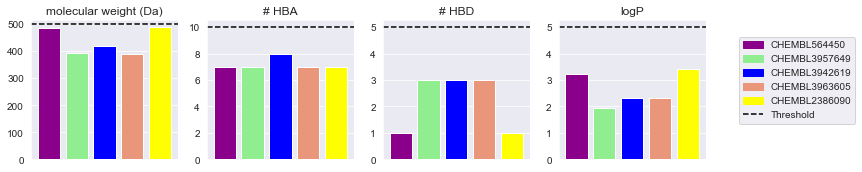

In [36]:
# Start 1x4 plot frame
fig, axes = plt.subplots(figsize=(10, 2.5), nrows=1, ncols=4)
x = np.arange(1, len(comp_5_lipinski) + 1)
colors = ["DarkMagenta", "LightGreen", "blue", "DarkSalmon", "yellow"]

# Create subplots
for index, (key, (threshold, title)) in enumerate(ro5_properties.items()):
    axes[index].bar([0, 1, 2, 3, 4], comp_5_lipinski [key], color=colors)
    axes[index].axhline(y=threshold, color="black", linestyle="dashed")
    axes[index].set_title(title)
    axes[index].set_xticks([])

# Add legend
legend_elements = [mpatches.Patch(color=colors[index], label=row["molecule_chembl_id"]) for index, row in comp_5_lipinski.iterrows()]
legend_elements.append(Line2D([0], [0], color="black", ls="dashed", label="Threshold"))
fig.legend(handles=legend_elements, bbox_to_anchor=(1.2, 0.8))

# Fit subplots and legend into figure
plt.tight_layout()
plt.show()

## Plot the properties of the rule of five per molecule as scatter plots.

For plot this plot we will need to delete de column that have the pIC50 becuase we wnat to compare only the chemistry properties of the rule of five.

In [37]:
comp_out_pic50 = lipinski_comp.drop(['pIC50'], axis=1)
comp_out_pic50.head(10)

,molecule_chembl_id,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL564450,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i...",484.211055,7,1,3.2107,yes
1,CHEMBL3957649,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,"<img data-content=""rdkit/molecule"" src=""data:i...",393.171336,7,3,1.9218,yes
2,CHEMBL3942619,COc1ccc(-c2cnc(N)c(C(=O)Nc3cnccc3N3CCC(N)CC3)n...,"<img data-content=""rdkit/molecule"" src=""data:i...",419.206973,8,3,2.3092,yes
3,CHEMBL3963605,Nc1ncc(-c2ccccc2)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i...",389.196408,7,3,2.3006,yes
4,CHEMBL2386090,O=C1NC(=O)C(c2cn3c4c(cccc24)CN(C(=O)c2cnccn2)C...,"<img data-content=""rdkit/molecule"" src=""data:i...",489.143704,7,1,3.4007,yes
5,CHEMBL4077376,C[C@@H]1CN(c2ccccc2F)CCN1c1nc(-c2ccncn2)cc(=O)n1C,"<img data-content=""rdkit/molecule"" src=""data:i...",380.176088,7,0,2.0915,yes
6,CHEMBL4063206,COc1cccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](...,"<img data-content=""rdkit/molecule"" src=""data:i...",392.196074,8,0,1.9610,yes
7,CHEMBL3091542,COc1cccc(OC)c1[C@H]1CN(c2nc(-c3ccncn3)cc(=O)n2...,"<img data-content=""rdkit/molecule"" src=""data:i...",409.175004,9,0,1.8324,yes
8,CHEMBL491647,COCc1cccc2c(C3=C(c4coc5ccccc45)C(=O)NC3=O)cn(C...,"<img data-content=""rdkit/molecule"" src=""data:i...",386.126657,5,1,3.6381,yes
9,CHEMBL4076186,COc1cc(F)ccc1C1CN(c2nc(-c3ccncn3)cc(=O)n2C)CCN...,"<img data-content=""rdkit/molecule"" src=""data:i...",432.147680,8,1,1.9577,yes


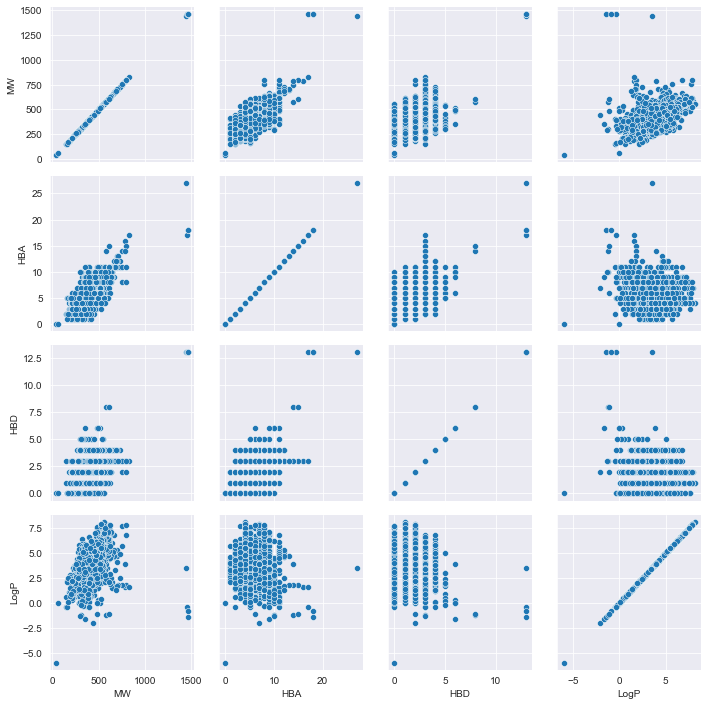

In [38]:
comparison_ro5 = sns.PairGrid(comp_out_pic50)
comparison_ro5.map(sns.scatterplot)

## Plot the properties of the rule of five per molecule as radar plot.

In [39]:
# Import the dataset
lipinski_comp = pd.read_csv('data/GSK3B_compounds_lipinski.csv')

In [40]:
lipinski_comp.head(10)

,molecule_chembl_id,pIC50,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i...",484.211055,7,1,3.2107,yes
1,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,"<img data-content=""rdkit/molecule"" src=""data:i...",393.171336,7,3,1.9218,yes
2,CHEMBL3942619,9.70,COc1ccc(-c2cnc(N)c(C(=O)Nc3cnccc3N3CCC(N)CC3)n...,"<img data-content=""rdkit/molecule"" src=""data:i...",419.206973,8,3,2.3092,yes
3,CHEMBL3963605,9.70,Nc1ncc(-c2ccccc2)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i...",389.196408,7,3,2.3006,yes
4,CHEMBL2386090,9.70,O=C1NC(=O)C(c2cn3c4c(cccc24)CN(C(=O)c2cnccn2)C...,"<img data-content=""rdkit/molecule"" src=""data:i...",489.143704,7,1,3.4007,yes
5,CHEMBL4077376,9.70,C[C@@H]1CN(c2ccccc2F)CCN1c1nc(-c2ccncn2)cc(=O)n1C,"<img data-content=""rdkit/molecule"" src=""data:i...",380.176088,7,0,2.0915,yes
6,CHEMBL4063206,9.70,COc1cccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](...,"<img data-content=""rdkit/molecule"" src=""data:i...",392.196074,8,0,1.9610,yes
7,CHEMBL3091542,9.64,COc1cccc(OC)c1[C@H]1CN(c2nc(-c3ccncn3)cc(=O)n2...,"<img data-content=""rdkit/molecule"" src=""data:i...",409.175004,9,0,1.8324,yes
8,CHEMBL491647,9.64,COCc1cccc2c(C3=C(c4coc5ccccc45)C(=O)NC3=O)cn(C...,"<img data-content=""rdkit/molecule"" src=""data:i...",386.126657,5,1,3.6381,yes
9,CHEMBL4076186,9.60,COc1cc(F)ccc1C1CN(c2nc(-c3ccncn3)cc(=O)n2C)CCN...,"<img data-content=""rdkit/molecule"" src=""data:i...",432.147680,8,1,1.9577,yes


Due to the chemical properties of the rule of five are in different scale we need to to transform them so that they are on the same scale in order to plot them in the radar plot. So we will scale all property values to a scaled between 0 and 10.

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,10))
scaler.fit(lipinski_comp[['MW', 'HBA', 'HBD', 'LogP']])
lipinski_comp_scaled = scaler.transform(lipinski_comp[['MW', 'HBA', 'HBD', 'LogP']])
lipinski_comp_scaled = lipinski_comp.join(pd.DataFrame(lipinski_comp_scaled, columns=['MW_scaled', 'HBA_scaled', 'HBD_scaled', 'LogP_scaled']))

In [42]:
lipinski_comp_scaled.head()

,molecule_chembl_id,pIC50,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform,MW_scaled,HBA_scaled,HBD_scaled,LogP_scaled
0,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,"<img data-content=""rdkit/molecule"" src=""data:i...",484.211055,7,1,3.2107,yes,3.108188,2.592593,0.769231,6.512604
1,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,"<img data-content=""rdkit/molecule"" src=""data:i...",393.171336,7,3,1.9218,yes,2.468315,2.592593,2.307692,5.600470
2,CHEMBL3942619,9.70,COc1ccc(-c2cnc(N)c(C(=O)Nc3cnccc3N3CCC(N)CC3)n...,"<img data-content=""rdkit/molecule"" src=""data:i...",419.206973,8,3,2.3092,yes,2.651307,2.962963,2.307692,5.874627
3,CHEMBL3963605,9.70,Nc1ncc(-c2ccccc2)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,"<img data-content=""rdkit/molecule"" src=""data:i...",389.196408,7,3,2.3006,yes,2.440377,2.592593,2.307692,5.868541
4,CHEMBL2386090,9.70,O=C1NC(=O)C(c2cn3c4c(cccc24)CN(C(=O)c2cnccn2)C...,"<img data-content=""rdkit/molecule"" src=""data:i...",489.143704,7,1,3.4007,yes,3.142857,2.592593,0.769231,6.647064


For the radar plot we need the mean and standard deviations of a dataset, so we will create a function that allows us to calculate these two statistics for the scaled values.

For the radar plot we need the mean and standard deviations of a dataset, so we will create a function that allows us to calculate these two statistics.

In [43]:
def get_properties_stats_scaled(data_df):
    properties = ['MW_scaled', 'HBA_scaled', 'HBD_scaled', 'LogP_scaled']
    data_stats = []

    for i in properties:
        std = data_df[i].std()
        mean = data_df[i].mean()
        stats = pd.DataFrame([[round(mean, 2), round(std, 2)]], index=[i], columns=["mean", "std"])
        data_stats.append(stats)

    data_stats = pd.concat(data_stats)

    return data_stats

In [44]:
# Now we will calculate the mean and standard deviations of the dataset without filter
stats_rof = get_properties_stats_scaled(lipinski_comp_scaled)
print('Scaled property values - without filter')
print(stats_rof)

# Now we will calculate the mean and standard deviations of the dataset filter and that keep to the rule of five
stats_yes_rof = get_properties_stats_scaled(lipinski_comp_scaled[lipinski_comp_scaled['rule_of_five_conform']=='yes'])
print('Scaled property values - filter: rule_of_five_conform=yes ')
print(stats_yes_rof)

# Now we will calculate the mean and standard deviations of the dataset filter and that do not keep to the rule of five
stats_not_rof = get_properties_stats_scaled(lipinski_comp_scaled[lipinski_comp_scaled['rule_of_five_conform']=='no'])
print('Scaled property values - filter: rule_of_five_conform=no')
print(stats_not_rof)

Scaled property values - without filter
             mean   std
MW_scaled    2.46  0.74
HBA_scaled   2.04  0.82
HBD_scaled   1.37  0.96
LogP_scaled  6.66  1.03
Scaled property values - filter: rule_of_five_conform=yes 
             mean   std
MW_scaled    2.34  0.55
HBA_scaled   1.97  0.72
HBD_scaled   1.34  0.88
LogP_scaled  6.54  0.89
Scaled property values - filter: rule_of_five_conform=no
             mean   std
MW_scaled    3.96  1.05
HBA_scaled   2.91  1.29
HBD_scaled   1.85  1.60
LogP_scaled  8.18  1.36


Finally, we are ready to do the radar plot, as input we will need some of the information above.

In [45]:
def plot_radar(stats):
    # ------- PART 1: Create background
    # number of variable
    N = 4

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the radar plot
    fig = plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    # ax.set_theta_offset(pi / 2)
    # ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels
    categories = ['MW (scaled)', 'HBA (scaled)', 'HBD (scaled)', 'LogP (scaled)']
    plt.xticks(angles[:-1], categories, size=14)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([2, 4, 6, 8, 10], ["2", "4", "6", "8", "10"],
               color="grey", size=12)
    plt.ylim(0,11)

    # ------- PART 2: Add plots

    # Plot each individual = each line of the data

    # data
    data = stats['mean'].values
    data = np.append(data, data[0])
    ax.plot(angles, data, linewidth=3, linestyle='solid', color='purple', label="mean")

    # data + std
    data_std_up = (stats['mean'].values + stats['std'].values).flatten().tolist()
    data_std_up = np.append(data_std_up, data_std_up[0])
    ax.plot(angles, data_std_up, linewidth=2, linestyle='dashed', color='limegreen', label="mean + std")
    # data - std
    data_std_down = stats['mean'].values - stats['std'].values
    data_std_down = np.append(data_std_down, data_std_down[0])
    ax.plot(angles, data_std_down, linewidth=2, linestyle='dashdot', color='limegreen', label="mean - std")

    # rule of five area
    ro5_properties = {"MW": 500, "HBA": 10, "HBD": 5, "LogP": 5}
    ro5_properties_scaled = scaler.transform(pd.DataFrame([ro5_properties]))
    ro5_properties_scaled = np.append(ro5_properties_scaled[0].tolist(), ro5_properties_scaled[0].tolist()[0])

    ax.fill(angles, ro5_properties_scaled, 'thistle', alpha=0.6, label="rule of five area")

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # Show the graph
    plt.show()

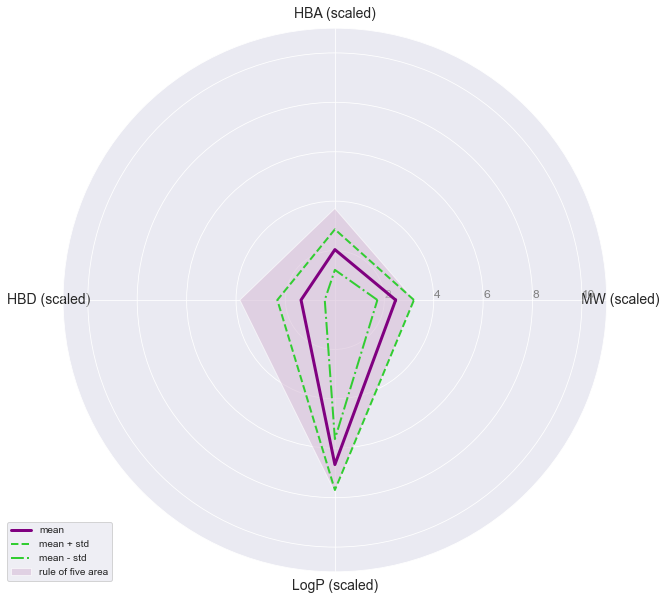

In [46]:
# We plot the radarplot for the dataset of compounds (ALL).
plot_radar(stats_rof)

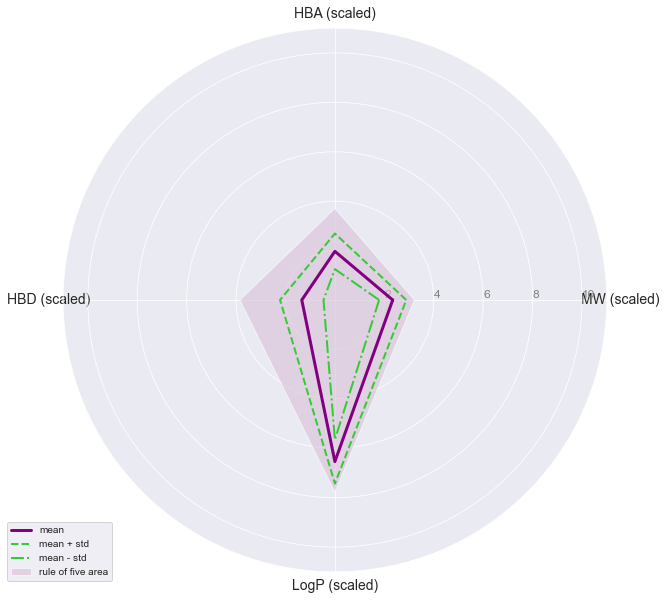

In [47]:
# We plot the radarplot for the dataset of compounds that fulfill the Ro5
plot_radar(stats_yes_rof)

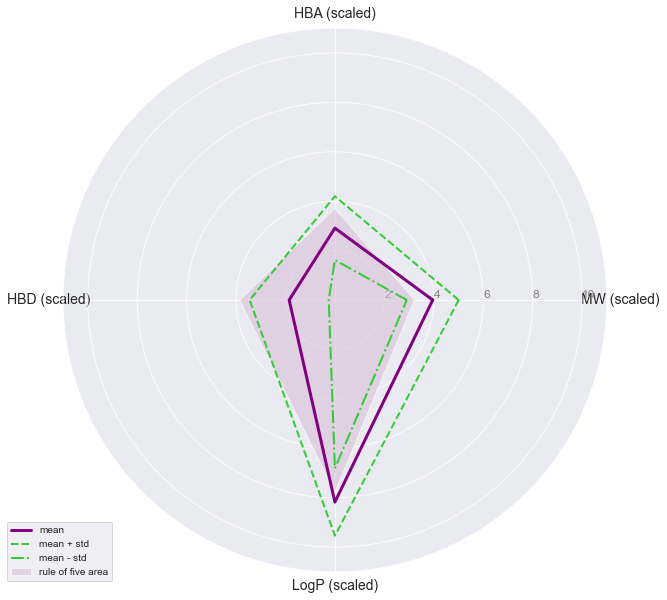

In [48]:
# We plot the radarplot for the dataset of compounds that violate the Ro5
plot_radar(stats_not_rof)

## Practical activity

Taking into account what you have learned in this Notebook, answer:
1. How can you make a bar plot for the complete dataset?
2. How can you make a scatter plot for the dataset that fulfill the rule of five?

## Conclusion

In this practice, we have learned about Lipinski's rule of five as a measure to estimate a compound's oral bioavailability and we have applied the rule on a dataset. Also, we learn different plots that allow as to visualize how the dataset is regarding with the rule of five.